In [11]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [12]:
tickers = ["TSLA", "PG", "WMT", "BOE"]

div_df = pd.DataFrame()

for t in tickers:
    div_df[t] = wb.DataReader(t, data_source = "yahoo", start = "2020-01-01")["Adj Close"]
    
div_df.head()

,TSLA,PG,WMT,BOE
Date,,,,
2020-01-02,86.052002,120.435463,116.987091,10.205777
2020-01-03,88.601997,119.625465,115.954330,10.085601
2020-01-06,90.307999,119.791367,115.718269,10.131823
2020-01-07,93.811996,119.049675,114.646172,10.215021
2020-01-08,98.428001,119.557144,114.252739,10.251998


In [13]:
div_return = np.log(div_df / div_df.shift(1))

div_return.head()

,TSLA,PG,WMT,BOE
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.029203,-0.006748,-0.008867,-0.011845
2020-01-06,0.019072,0.001386,-0.002038,0.004572
2020-01-07,0.038067,-0.006211,-0.009308,0.008178
2020-01-08,0.048033,0.004254,-0.003438,0.003613


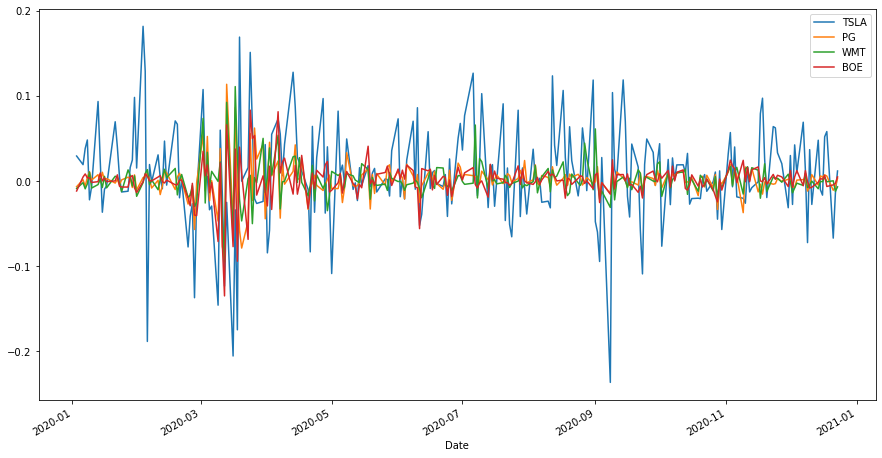

In [14]:
div_return.plot(figsize = (15, 8))
plt.show()

Individual Risk

In [16]:
div_a_var = div_return.var() * 250

div_a_var

TSLA    0.812436
PG      0.106029
WMT     0.098474
BOE     0.113289
dtype: float64

Portfolio Risk

In [5]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [8]:
pfolio_var = np.dot(weights.T, np.dot(div_return.cov() * 250, weights))

pfolio_var

0.12526052464713403

In [10]:
pfolio_vol = pfolio_var ** 0.5

pfolio_vol

0.3539216363082851

Diversifiable Risk

In [24]:
dr = pfolio_var - (div_a_var["TSLA"] * weights[0] ** 2) - (div_a_var["PG"] * weights[1] ** 2) - (div_a_var["WMT"] * weights[2] ** 2) - (div_a_var["BOE"] * weights[0] ** 2)

print("Diversifiable Risk: ", str(round(dr, 3) * 100), "%")


Diversifiable Risk:  5.5 %


Non-diversifiable Risk

In [26]:
n_dr = pfolio_var - dr

print("Diversifiable Risk: ", str(round(n_dr, 3) * 100), "%")

Diversifiable Risk:  7.1 %
